In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## ¿Como es la Variedad de acceso privado y publico por region y comuna?

In [2]:
df_censo = pd.read_csv('Cantidad-de-Personas-por-Sexo-y-Edad.csv', sep=";")
df_farmacias = pd.read_csv("2.-Farmacias-Chile-07.2023.csv", sep=";", encoding="utf-8")
df_hospitales = pd.read_excel("Establecimientos_ChileDEIS_MINSAL 03-11-2023.xlsx", sheet_name="Establecimientos Vigentes")

def modificar_nombre_columna(nombre: str):
    nombre = nombre.strip()  
    nombre = nombre.lower() 
    nombre = nombre.replace(" ", "_")
    nombre = nombre.replace("\xa0", "_")
    return nombre

nuevos_nombres = {columna: modificar_nombre_columna(columna) for columna in df_censo.columns}
df_censo.rename(columns=nuevos_nombres, inplace=True)
df_censo.columns

df_censo["código_región"] = pd.to_numeric(df_censo["código_región"], errors="coerce")
df_censo["código_provincia"] = pd.to_numeric(df_censo["código_provincia"], errors="coerce")
df_censo["código_comuna"] = pd.to_numeric(df_censo["código_comuna"], errors="coerce")
df_censo["edad"] = df_censo["edad"].astype("category")
df_censo["hombres"] = df_censo["hombres"].str.replace(".", "").astype("int")
df_censo["mujeres"] = df_censo["mujeres"].str.replace(".", "").astype("int")
df_censo["total"] = df_censo["total"].str.replace(".", "").astype("int")

df_hospitales.head(50)

,Versión 20231103,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Código Antiguo,Código Vigente,Código Madre Antiguo,Código Madre Nuevo,Código Región,Nombre Región,Código Dependencia Jerárquica (SEREMI / Servic...,Nombre Dependencia Jerárquica (SEREMI / Servic...,Pertenencia al SNSS,Tipo Establecimiento (Unidad),...,Tiene Servicio de Urgencia,Tipo de Urgencia,Clasificcion Tipo de SAPU,LATITUD [Grados decimales],LONGITUD [Grados decimales],Tipo de Prestador Sistema de Salud,Estado de Funcionamiento,Nivel de Complejidad,Tipo de Atención,Fecha de Incorporación a la base o cambios
1,26-704,126704,NaN,NaN,12,Región De Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente,Hospital,...,SI,Urgencia Hospitalaria (UEH),No Aplica,-54.935209,-67.600393,Público,Vigente en operación habitual,Baja Complejidad,Atención Cerrada-Hospitalaria,NaN
2,26-204,126204,NaN,NaN,12,Región De Magallanes y de la Antártica Chilena,12,SEREMI De Magallanes y la Antártica Chilena,No Perteneciente,Hospital,...,SI,Urgencia Hospitalaria (UEH),No Aplica,-54.934374,-67.608895,Pendiente,Vigente en operación habitual,Mediana Complejidad,Atención Cerrada-Hospitalaria,2022-10-07 00:00:00
3,26-412,126412,NaN,NaN,12,Región De Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente,Posta de Salud Rural (PSR),...,NO,No Aplica,No Aplica,-53.640546,-69.645848,Público,Vigente en operación habitual,Baja Complejidad,Atención Abierta-Ambulatoria,NaN
4,26-414,126414,NaN,NaN,12,Región De Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente,Posta de Salud Rural (PSR),...,NO,No Aplica,No Aplica,-53.404244,-70.990158,Público,Vigente en operación habitual,Baja Complejidad,Atención Abierta-Ambulatoria,NaN
5,26-102,126102,NaN,NaN,12,Región De Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente,Hospital,...,SI,Urgencia Hospitalaria (UEH),No Aplica,-53.298162,-70.358384,Público,Vigente en operación habitual,Baja Complejidad,Atención Cerrada-Hospitalaria,NaN
6,201364,201364,NaN,NaN,8,Región Del Bíobío,8,SEREMI Del Biobío,No Perteneciente,Clínica Dental,...,No,No Aplica,No Aplica,-37.468505,-72.340387,Privado,Vigente en operación habitual,Mediana Complejidad,Atención Abierta-Ambulatoria,2023-04-18 00:00:00
7,26-902,200311,26-301,126301,12,Región De Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente,Centro Comunitario de Salud Familiar (CECOSF),...,NO,No Aplica,No Aplica,-53.180523,-70.951523,Público,Vigente en operación habitual,Baja Complejidad,Atención Abierta-Ambulatoria,NaN
8,26-911,200710,NaN,NaN,12,Región De Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente,Centro de Salud Mental,...,NO,No Aplica,No Aplica,-53.178263,-70.921575,Público,Vigente en operación habitual,Mediana Complejidad,Atención Abierta-Ambulatoria,NaN
9,26-606,126606,26-010,126010,12,Región De Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente,Centro Comunitario de Salud Mental (COSAM),...,NO,No Aplica,No Aplica,-53.178248,-70.922132,Público,Vigente en operación habitual,Mediana Complejidad,Atención Abierta-Ambulatoria,NaN


## Por region

In [3]:
df_hospitales.columns = df_hospitales.loc[0,:]
df_hospitales.drop(0, inplace=True)
df_hospitales.drop(columns=["Código Antiguo ", "Código  Madre Antiguo", "Código Madre Nuevo", "Código  Madre Antiguo", "Fecha de Incorporación a la base o cambios", "Teléfono", "Fecha Inicio Funcionamiento", "Vía", "Certificación ", "Número", "Dirección", "Clasificcion Tipo de SAPU", "Dependencia Administrativa"], inplace=True)

In [4]:

df_salud_publica = df_hospitales[df_hospitales['Tipo de Prestador Sistema de Salud'] == 'Público ']
df_salud_privada = df_hospitales[df_hospitales['Tipo de Prestador Sistema de Salud'] == 'Privado']

df_salud_publica = df_salud_publica.reset_index().drop(columns= ['index'])
df_salud_privada = df_salud_privada.reset_index().drop(columns= ['index'])

df_salud_publica_2 = df_salud_publica.dropna().reset_index().drop(columns= ['index'])
df_salud_privada_2 = df_salud_privada.dropna().reset_index().drop(columns= ['index'])

display(df_salud_privada_2.head(1))
display(df_salud_publica_2.head(1))


,Código Vigente,Código Región,Nombre Región,Código Dependencia Jerárquica (SEREMI / Servicio de Salud),Nombre Dependencia Jerárquica (SEREMI / Servicio de Salud),Pertenencia al SNSS,Tipo Establecimiento (Unidad),Ámbito de Funcionamiento,Nombre Oficial,Nivel de Atención,Código Comuna,Nombre Comuna,Tiene Servicio de Urgencia,Tipo de Urgencia,LATITUD [Grados decimales],LONGITUD [Grados decimales],Tipo de Prestador Sistema de Salud,Estado de Funcionamiento,Nivel de Complejidad,Tipo de Atención
0,201364,8,Región Del Bíobío,8,SEREMI Del Biobío,No Perteneciente,Clínica Dental,Establecimiento de Salud,UNO SALUD DENTAL LOS ÁNGELES 2,No Aplica,08301,Los Ángeles,No,No Aplica,-37.468505,-72.340387,Privado,Vigente en operación habitual,Mediana Complejidad,Atención Abierta-Ambulatoria


,Código Vigente,Código Región,Nombre Región,Código Dependencia Jerárquica (SEREMI / Servicio de Salud),Nombre Dependencia Jerárquica (SEREMI / Servicio de Salud),Pertenencia al SNSS,Tipo Establecimiento (Unidad),Ámbito de Funcionamiento,Nombre Oficial,Nivel de Atención,Código Comuna,Nombre Comuna,Tiene Servicio de Urgencia,Tipo de Urgencia,LATITUD [Grados decimales],LONGITUD [Grados decimales],Tipo de Prestador Sistema de Salud,Estado de Funcionamiento,Nivel de Complejidad,Tipo de Atención
0,126704,12,Región De Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente,Hospital,Establecimiento de Salud,Hospital Comunitario Cristina Calderón de Puer...,Primario,12201,Cabo de Hornos,SI,Urgencia Hospitalaria (UEH),-54.935209,-67.600393,Público,Vigente en operación habitual,Baja Complejidad,Atención Cerrada-Hospitalaria


Dividimos en 2 DataFrames para acceso público y privado

In [5]:
df_salud_privada_2 = df_salud_privada_2.groupby(['Nombre Región']).agg('count')
df_salud_publica_2 = df_salud_publica_2.groupby(['Nombre Región']).agg('count')

Realizamos un groupby para ambos DataFrames, resultando en 2 nuevos DataFrames agrupados por el nombre de la region.

In [6]:
Regiones = ['Región De Antofagasta', 'Región De Arica Parinacota', 'Región De Atacama',
              'Región De Aysén del General Carlos Ibañez del Campo', 'Región De Coquimbo',
             'Región De La Araucanía', 'Región De Los Lagos', 'Región De Los Ríos', 
             'Región De Magallanes y de la Antártica Chilena', 'Región De Tarapacá', 'Región De Valparaíso',
             'Región De Ñuble', 'Región Del Bíobío', 'Región Del Libertador Gral. B. OHiggins',
             'Región Del Maule', 'Región Metropolitana de Santiago']

In [7]:
df_salud_privada_2 = df_salud_privada_2[['Código Vigente']]
df_salud_privada_2['Region'] = Regiones
df_salud_publica_2 = df_salud_publica_2[['Código Vigente']]
df_salud_privada_2 = df_salud_privada_2.rename(columns= {'Código Vigente': 'Cantidad_Hospitales_Privados'})


Arreglamos el DataFrame cambiando nombres de columnas y crear una lista que contenga todas las regiones.

In [8]:

df_numero_hospitales = df_salud_privada_2

lista = list(df_salud_publica_2['Código Vigente'])
regiones_publicos = lista[0:11] + lista[12:17]

df_numero_hospitales['Cantidad_Hospitales_Publicos'] = regiones_publicos

data_hospitales = pd.DataFrame()
data_hospitales['Region'] = Regiones
data_hospitales['Cantidad_Establecimientos_Publicos'] = list(df_numero_hospitales['Cantidad_Hospitales_Publicos'])
data_hospitales['Cantidad_Establecimientos_Privados'] = list(df_numero_hospitales['Cantidad_Hospitales_Privados'])
data_hospitales

,Region,Cantidad_Establecimientos_Publicos,Cantidad_Establecimientos_Privados
0,Región De Antofagasta,65,100
1,Región De Arica Parinacota,34,32
2,Región De Atacama,57,79
3,Región De Aysén del General Carlos Ibañez del ...,47,10
4,Región De Coquimbo,184,75
5,Región De La Araucanía,326,63
6,Región De Los Lagos,328,79
7,Región De Los Ríos,123,54
8,Región De Magallanes y de la Antártica Chilena,37,20
9,Región De Tarapacá,58,36


Creamos un nuevo DataFrame que contiene las regiones, la cantidad de establecimientos publicos y privados que tiene esta.

In [9]:
priv = list(data_hospitales['Cantidad_Establecimientos_Privados'])
publ = list(data_hospitales['Cantidad_Establecimientos_Publicos'])
region_ = list(data_hospitales['Region'])

Usamos las columnas de datos de establecimientos publicos y privados en forma de lista para luego crear un grafico.

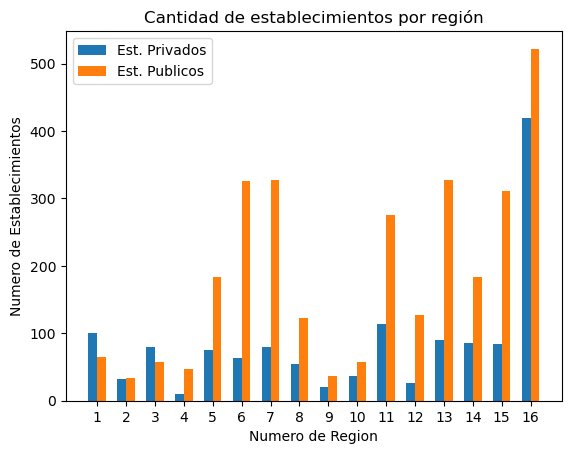

In [10]:

co = np.arange(start=1, stop=17, step=1)
an = 0.30

fig, ax = plt.subplots()
ax.bar(co- an/2,priv, an, label ='Est. Privados')
ax.bar(co+ an/2,publ, an, label ='Est. Publicos')
plt.xlabel('Numero de Region')
plt.ylabel('Numero de Establecimientos')
plt.xticks(co)
plt.legend(loc= 'upper left')
plt.title('Cantidad de establecimientos por región')
plt.show()

Creamos un grafico que nos indica la informacion del DataFrame anterior. Podemos concluir, gracias a este grafico, que existe una mayor variedad de establecimientos publicos en la mayoria de regiones, exceptuando por la 1ra y la 3ra región.

In [53]:
data_hospitales['Diff'] = (data_hospitales['Cantidad_Establecimientos_Privados']
                              - data_hospitales['Cantidad_Establecimientos_Publicos'])

In [54]:
def f(row):
    if row['Diff'] > 0:
        val = 'Privado'
    elif row['Diff'] <= 0:
        val = 'Publico'
    return val

data_hospitales['Domina'] = data_hospitales.apply(f, axis=1)
data_hospitales['Diff'] = abs(data_hospitales['Diff'])

In [55]:
display(data_hospitales['Diff'].describe())

count     16.000000
mean     109.375000
std       90.880049
min        2.000000
25%       31.750000
50%       99.000000
75%      177.500000
max      263.000000
Name: Diff, dtype: float64

In [61]:
data_publica = data_hospitales[data_hospitales['Domina'] == 'Publico']
data_privada = data_hospitales[data_hospitales['Domina'] == 'Privado']

display(data_publica[data_publica['Diff'] ==
                    data_publica['Diff'].max()])
display(data_privada[data_privada['Diff'] ==
                    data_privada['Diff'].max()])

,Region,Cantidad_Establecimientos_Publicos,Cantidad_Establecimientos_Privados,Diff,Domina
5,Región De La Araucanía,326,63,263,Publico


,Region,Cantidad_Establecimientos_Publicos,Cantidad_Establecimientos_Privados,Diff,Domina
0,Región De Antofagasta,65,100,35,Privado


## Por comuna

In [15]:
df_comunas_priv = df_salud_privada
df_comunas_priv = df_comunas_priv.dropna()
df_comunas_priv = df_comunas_priv.drop_duplicates()
df_comunas_priv = df_comunas_priv.groupby(['Nombre Comuna']).agg('count')


In [16]:
df_comunas_publ = df_salud_publica
df_comunas_publ = df_comunas_publ.dropna()
df_comunas_publ = df_comunas_publ.drop_duplicates()
df_comunas_publ = df_comunas_publ.groupby(['Nombre Comuna']).agg('count')


Hacemos limpieza de los datos de nuestros nuevos DataFrames que estaran haciendo un groupby para trabajar con datos de comunas.

In [17]:
df_establecimientos_comunas = pd.DataFrame()
df_establecimientos_comunas['Comuna'] = list(df_comunas_publ.index)
df_establecimientos_comunas = df_establecimientos_comunas.drop_duplicates()

In [18]:
df_establecimientos_comunas['Publicos'] = list(df_comunas_publ['Nombre Región'])
df_establecimientos_comunas

,Comuna,Publicos
0,Aisén,7
1,Algarrobo,4
2,Alhué,5
3,Alto Biobío,10
4,Alto Hospicio,10
...,...,...
342,Yumbel,9
343,Yungay,3
344,Zapallar,5
345,Ñiquén,7


Creamos un nuevo DataFrame que contiene las 346 comunas de Chile junto a una columna con la cantidad de establecimientos publicos que contiene cada una.

In [19]:
df_comunas_priv_3 = df_comunas_priv.reset_index()[['Nombre Comuna', 'Código Vigente']]
df_comunas_priv_3 = df_comunas_priv_3.rename(columns={'Nombre Comuna': 'Comuna'})

Creamos un DataFrame con las comunas que tienen establecimientos Privados.

In [20]:
df_establecimientos_comunas = pd.merge(df_establecimientos_comunas, df_comunas_priv_3, how='left', right_on='Comuna', left_on='Comuna')
df_establecimientos_comunas = df_establecimientos_comunas.rename(columns={'Código Vigente': 'Privados'})

Usamos .merge para unir ambos DataFrames para crear uno nuevo que contenga Comuna, establecimientos publicos y privados.

In [21]:
df_establecimientos_comunas = df_establecimientos_comunas.fillna(0)

In [22]:
df_establecimientos_comunas['Privados'] = df_establecimientos_comunas['Privados'].astype(int)
df_establecimientos_comunas['Publicos'] = df_establecimientos_comunas['Publicos'].astype(int)

Llenamos con 0 los valores NaN que posee nuestro DataFrame y convertimos el tipo de datos de ambas columnas a int.

In [23]:
df_establecimientos_comunas

,Comuna,Publicos,Privados
0,Aisén,7,2
1,Algarrobo,4,0
2,Alhué,5,1
3,Alto Biobío,10,0
4,Alto Hospicio,10,2
...,...,...,...
342,Yumbel,9,0
343,Yungay,3,0
344,Zapallar,5,0
345,Ñiquén,7,0


In [24]:
df_establecimientos_comunas['Diff'] = (df_establecimientos_comunas['Publicos']
                                       - df_establecimientos_comunas['Privados'])

In [25]:
def f(row):
    if row['Diff'] < 0:
        val = 'Privado'
    elif row['Diff'] >= 0:
        val = 'Publico'
    return val

df_establecimientos_comunas['Domina'] = df_establecimientos_comunas.apply(f, axis=1)
df_establecimientos_comunas['Diff'] = abs(df_establecimientos_comunas['Diff'])

Agregamos una nueva columna 'Diff' que indica la diferencia entre establecimientos publicos y privados de la comuna y una columna 'Domina' que indica que tipo de establecimiento es el que mas abunda en la misma.

In [26]:
df_establecimientos_comunas['Domina'].value_counts()

Domina
Publico    322
Privado     25
Name: count, dtype: int64

Usando value_counts() vemos que en 25 comunas existe una mayor variedad de establecimientos privados que de publicos.

In [30]:
df_privados_count = df_establecimientos_comunas[
    df_establecimientos_comunas['Domina'] == 'Privado']
df_publicos_count = df_establecimientos_comunas[
    df_establecimientos_comunas['Domina'] == 'Publico']

display(df_privados_count.head(3))
display(df_publicos_count.head(3))

,Comuna,Publicos,Privados,Diff,Domina
9,Antofagasta,28,62,34,Privado
12,Arica,28,32,4,Privado
18,Calama,17,33,16,Privado


,Comuna,Publicos,Privados,Diff,Domina
0,Aisén,7,2,5,Publico
1,Algarrobo,4,0,4,Publico
2,Alhué,5,1,4,Publico


In [62]:
display(df_privados_count[df_privados_count['Diff']
                 == df_privados_count['Diff'].max()])
display(df_publicos_count[df_publicos_count['Diff']
                 == df_publicos_count['Diff'].max()])

,Comuna,Publicos,Privados,Diff,Domina
227,Providencia,19,75,56,Privado


,Comuna,Publicos,Privados,Diff,Domina
157,Los Ángeles,40,14,26,Publico


In [63]:
df_establecimientos_comunas.describe()

,Publicos,Privados,Diff
count,347.000000,347.000000,347.000000
mean,8.674352,3.930836,6.708934
std,6.960708,9.848908,5.721777
min,1.000000,0.000000,0.000000
25%,4.000000,0.000000,4.000000
50%,7.000000,0.000000,6.000000
75%,11.000000,2.000000,8.000000
max,44.000000,75.000000,56.000000


Respondiendo nuestra pregunta sobre la variedad de acceso público y privado por región y comuna tenemos que: 

- En cuanto a la variedad regional existe una mayor variedad de establecimientos de acceso publico que privado exceptuando por la 1era y tercera región; donde la mayor variedad de establecimientos publicos que se encuentre en la region de la Araucanía, mientras que la mayor variedad de establecimientos privados es en la region de Antofagasta.

- En la variedad comunal existe una mayor variedad de establecimientos privados en 25 regiones donde la comuna con mayor variedad es la comuna de Providencia, con mayor variedad de establecimientos privados, mientras que la comuna de Los Ángeles posee la mayor variedad de establecimientos publicos.
